<a href="https://colab.research.google.com/github/Soumi7/PG-StockManagement/blob/master/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [420]:
pip install pycaret

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv("GB.csv")

In [585]:


df.head()

,date,ishol/week,group,name,quantity,unit_cogs,monthly_Avgtemp,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity
0,2018-01-05,11,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,376.0,0.450000,15.965,15.42,2,0,73.23
1,2018-01-07,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,356.0,0.450000,19.725,19.90,2,1,75.97
2,2018-01-06,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,349.0,0.450000,17.065,17.10,2,1,72.30
3,2018-01-08,9,DRINK_JUICE,WODA MUSZYNIANKA PLUS 1_5L N/G,288.0,1.239688,19.920,20.06,2,0,69.97
4,2018-01-04,10,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,254.0,0.450000,12.080,10.37,1,1,72.47


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
min(df["quantity"])
df=df.drop(["date"],axis=1)



In [587]:
df.head()

,ishol/week,group,name,quantity,unit_cogs,monthly_Avgtemp,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity
0,11,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,376.0,0.450000,15.965,15.42,2,0,73.23
1,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,356.0,0.450000,19.725,19.90,2,1,75.97
2,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,349.0,0.450000,17.065,17.10,2,1,72.30
3,9,DRINK_JUICE,WODA MUSZYNIANKA PLUS 1_5L N/G,288.0,1.239688,19.920,20.06,2,0,69.97
4,10,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,254.0,0.450000,12.080,10.37,1,1,72.47


In [0]:
df=df[df["quantity"]>1]

In [0]:
import numpy as np
df["quantity"]=np.log(df["quantity"])

In [590]:
df.head()

,ishol/week,group,name,quantity,unit_cogs,monthly_Avgtemp,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity
0,11,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,5.929589,0.450000,15.965,15.42,2,0,73.23
1,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,5.874931,0.450000,19.725,19.90,2,1,75.97
2,9,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,5.855072,0.450000,17.065,17.10,2,1,72.30
3,9,DRINK_JUICE,WODA MUSZYNIANKA PLUS 1_5L N/G,5.662960,1.239688,19.920,20.06,2,0,69.97
4,10,DRINK_JUICE,ORANZADA W BUT.ZWROTNEJ,5.537334,0.450000,12.080,10.37,1,1,72.47


In [0]:
from pycaret.regression import*

In [593]:
model=setup(data = df, target = 'quantity', session_id=123,normalize=True,high_cardinality_features = ['name',"group"],numeric_features=["ishol/week","monthly_avg_HeatIndexC","monthly_avg_cloudcover"])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5772, 10)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [595]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.587500,0.549200,0.740600,0.561800,0.255200,0.407500
1,CatBoost Regressor,0.590300,0.554900,0.744400,0.558000,0.255900,0.410500
2,Gradient Boosting Regressor,0.601600,0.572400,0.756000,0.544600,0.258200,0.418700
3,Random Forest,0.588800,0.570900,0.755100,0.543200,0.260800,0.410700
4,Extreme Gradient Boosting,0.604000,0.575800,0.758200,0.541800,0.258800,0.419100
5,AdaBoost Regressor,0.669100,0.672500,0.819400,0.465100,0.286300,0.509500
6,Extra Trees Regressor,0.671300,0.748500,0.864700,0.400000,0.294600,0.453900
7,Support Vector Machine,0.669600,0.774100,0.878300,0.388900,0.281300,0.444300
8,K Neighbors Regressor,0.702000,0.824300,0.906900,0.345900,0.294900,0.470500
9,Bayesian Ridge,0.742300,0.915300,0.955300,0.276400,0.305200,0.499200


In [596]:
model=create_model( "lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5733,0.5086,0.7131,0.5140,0.2559,0.4205
1,0.5998,0.5725,0.7566,0.4917,0.2600,0.3957
2,0.6229,0.6340,0.7962,0.5677,0.2664,0.4313
3,0.5699,0.5200,0.7211,0.5855,0.2486,0.3867
4,0.5870,0.5457,0.7387,0.5587,0.2501,0.3947
5,0.5838,0.5568,0.7462,0.6398,0.2541,0.4004
6,0.5571,0.4833,0.6952,0.5645,0.2452,0.4028
7,0.5829,0.5294,0.7276,0.6441,0.2542,0.4180
8,0.6087,0.5972,0.7728,0.5874,0.2627,0.4226
9,0.5900,0.5451,0.7383,0.4649,0.2548,0.4026


In [597]:
tuned_mod=tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5644,0.4911,0.7008,0.5307,0.2510,0.4181
1,0.5932,0.5521,0.7430,0.5098,0.2544,0.3885
2,0.6294,0.6354,0.7971,0.5667,0.2658,0.4339
3,0.5794,0.5375,0.7332,0.5715,0.2516,0.3944
4,0.5881,0.5451,0.7383,0.5592,0.2478,0.3940
5,0.5950,0.5595,0.7480,0.6380,0.2545,0.4111
6,0.5437,0.4629,0.6804,0.5829,0.2404,0.3993
7,0.6011,0.5629,0.7503,0.6215,0.2589,0.4310
8,0.6043,0.5865,0.7658,0.5948,0.2613,0.4218
9,0.5972,0.5443,0.7377,0.4657,0.2529,0.4033


In [598]:
tuned_mod2=tune_model('lightgbm',n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5686,0.5007,0.7076,0.5215,0.2525,0.4170
1,0.5960,0.5589,0.7476,0.5038,0.2563,0.3902
2,0.6217,0.6332,0.7957,0.5682,0.2656,0.4296
3,0.5716,0.5184,0.7200,0.5867,0.2487,0.3915
4,0.5807,0.5334,0.7303,0.5686,0.2451,0.3865
5,0.5943,0.5577,0.7468,0.6392,0.2536,0.4068
6,0.5437,0.4650,0.6819,0.5809,0.2413,0.3974
7,0.5908,0.5504,0.7419,0.6299,0.2563,0.4224
8,0.6028,0.5872,0.7663,0.5943,0.2617,0.4210
9,0.5900,0.5352,0.7316,0.4746,0.2517,0.4003


In [599]:
ensembled_model=ensemble_model(tuned_mod, method = 'Boosting')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5779,0.5139,0.7169,0.5089,0.2572,0.4319
1,0.6014,0.5585,0.7473,0.5041,0.2574,0.3998
2,0.6284,0.6327,0.7954,0.5685,0.2680,0.4461
3,0.5752,0.5211,0.7219,0.5846,0.2503,0.3997
4,0.5883,0.5440,0.7375,0.5601,0.2521,0.4146
5,0.5901,0.5335,0.7304,0.6549,0.2532,0.4172
6,0.5635,0.4908,0.7006,0.5577,0.2463,0.4159
7,0.6085,0.5771,0.7597,0.6120,0.2656,0.4482
8,0.5930,0.5572,0.7465,0.6150,0.2572,0.4221
9,0.5947,0.5470,0.7396,0.4630,0.2551,0.4133


In [600]:
print(ensembled_model)

AdaBoostRegressor(base_estimator=LGBMRegressor(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.2, max_depth=20,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.7,
                                               n_estimators=120, n_jobs=-1,
                                               num_leaves=100, objective=None,
                                               random_state=123, reg_alpha=0.6,
                                               reg_lambda=0.7, silent=True,
                                               subsample=1.0,
                                               subsample_for_bin

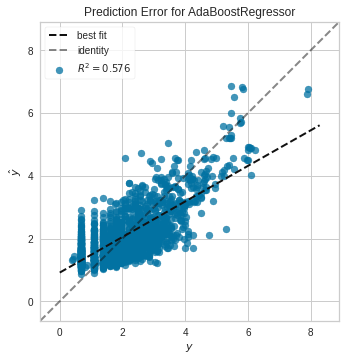

In [601]:
plot_model(ensembled_model, plot = 'error')

In [602]:
predict_model(ensembled_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ada Boost Regressor,0.6014,0.5474,0.7399,0.5756,0.2581,0.43


,ishol/week,group,name,unit_cogs,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity,quantity,Label
0,-0.398009,-1.114535,0.742330,-0.036464,0.945502,1.033787,-0.27851,-0.557923,2.197225,1.6983
1,2.312147,0.571349,1.252721,-0.086084,-1.119622,-0.597883,2.11547,2.383392,2.639057,1.9065
2,-0.398009,0.571349,0.487135,-0.893843,-1.161503,-0.597883,0.91848,-0.389899,3.044522,2.3711
3,-0.398009,-1.555539,0.997525,-0.416709,-0.682865,-0.597883,-0.27851,0.941642,2.484907,1.7207
4,-0.398009,-1.114535,-1.044037,-0.586723,1.224708,1.033787,-0.27851,0.105138,2.708050,1.4902
...,...,...,...,...,...,...,...,...,...,...
1727,-0.398009,-0.848891,1.252721,-0.133092,-0.682865,-0.597883,-0.27851,0.941642,1.945910,2.9085
1728,2.312147,-1.302049,1.252721,1.168254,-1.119622,-0.597883,2.11547,2.383392,2.014903,3.2151
1729,-0.398009,0.571349,0.231939,-0.674471,-1.161503,-0.597883,0.91848,-0.389899,1.098612,2.0749
1730,-0.398009,0.571349,-1.044037,0.373030,1.240662,1.033787,-1.47550,-0.978885,1.386294,1.4516


In [0]:
final_mod=finalize_model(ensembled_model)

In [604]:
save_model(final_mod,"gb")

Transformation Pipeline and Model Succesfully Saved
